In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
##leemos el csv de mi ciudad
df = pd.read_csv("CopenhagueActualizado.csv")

In [5]:
#Verificamos información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21722 entries, 0 to 21721
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            21722 non-null  int64  
 1   listing_url                                   21722 non-null  object 
 2   scrape_id                                     21722 non-null  int64  
 3   last_scraped                                  21722 non-null  object 
 4   source                                        21722 non-null  object 
 5   name                                          21722 non-null  object 
 6   description                                   21118 non-null  object 
 7   neighborhood_overview                         8396 non-null   object 
 8   picture_url                                   21722 non-null  object 
 9   host_id                                       21722 non-null 

In [6]:
#Corroboramos valores nulos
valores_nulos=df.isnull().sum()
valores_nulos

id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Length: 79, dtype: int64

In [7]:
cuantitativas = df.iloc[:, 1:]
cualitativas = df.iloc[:, [0]]
y = cuantitativas.select_dtypes(include=[np.number]).copy() ##numéricas para los cálculos

<Figure size 1500x800 with 0 Axes>

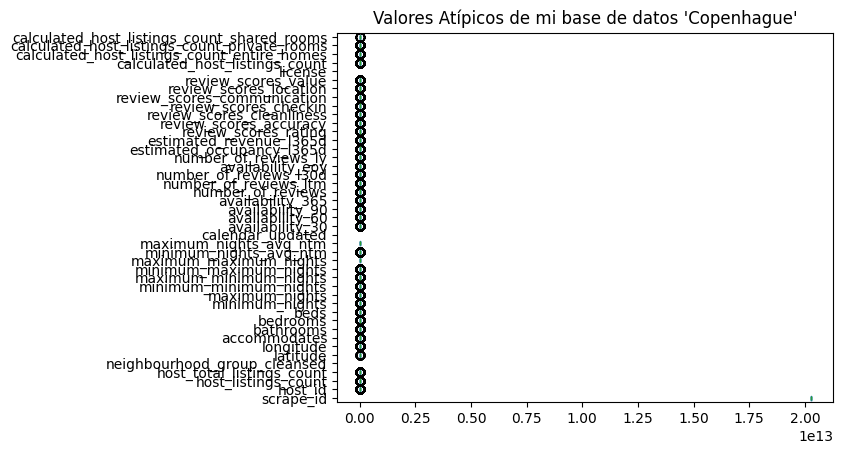

In [8]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe

plt.figure(figsize=(15, 8))
y.plot(kind="box", vert=False)
plt.title("Valores Atípicos de mi base de datos 'Copenhague'")
plt.show()

In [9]:
#Método aplicando desviación estandar. Encuentro los valores extremos
#ejemplo valores atipicos
##y=cuantitativas
##Limite_Superior= y.mean() + 3*y.std()
##Limite_Inferior= y.mean() - 3*y.std()
#print("Limite superior permitido", Limite_Superior)
#print("Limite inferior permitido", Limite_Inferior)

#solo numéricas:
y = cuantitativas.select_dtypes(include=[float, int]).copy()

Limite_Superior = y.mean(numeric_only=True) + 3*y.std(numeric_only=True)
Limite_Inferior = y.mean(numeric_only=True) - 3*y.std(numeric_only=True)

print("Límite superior permitido:\n", Limite_Superior)
print("Límite inferior permitido:\n", Limite_Inferior)

Límite superior permitido:
 scrape_id                                       2.025032e+13
host_id                                         6.944995e+08
host_listings_count                             1.239807e+02
host_total_listings_count                       3.138809e+02
neighbourhood_group_cleansed                             NaN
latitude                                        5.573784e+01
longitude                                       1.265226e+01
accommodates                                    8.252334e+00
bathrooms                                       2.077122e+00
bedrooms                                        4.285890e+00
beds                                            5.672711e+00
minimum_nights                                  5.748558e+01
maximum_nights                                  1.484814e+03
minimum_minimum_nights                          5.369279e+01
maximum_minimum_nights                          5.643983e+01
minimum_maximum_nights                          1.686747e

In [10]:
##dejo NaN donde se salen de los límites
data3 = y[(y <= Limite_Superior) & (y >= Limite_Inferior)]
data3
##relleno los nan con el promedio y redondeo a 1
data_clean = data3.fillna(round(data3.mean(), 1))
data_clean

scrape_id    host_id  host_listings_count  \
0      20250323161241     129976                  1.0   
1      20250323161241     140105                  3.0   
2      20250323161241     142143                  1.0   
3      20250323161241     122489                  1.0   
4      20250323161241     167511                  1.0   
...               ...        ...                  ...   
21717  20250323161241  593936121                  1.0   
21718  20250323161241  158835175                  1.0   
21719  20250323161241  187610263                  1.7   
21720  20250323161241  187610263                  1.7   
21721  20250323161241  320890943                  1.0   

       host_total_listings_count  neighbourhood_group_cleansed   latitude  \
0                            1.0                           NaN  55.666602   
1                            4.0                           NaN  55.672638   
2                            1.0                           NaN  55.711760   
3                            4.0                           NaN  55.684288   
4                            1.0                           NaN  55.665070   
...                          ...                           ...        ...   
21717                        1.0                           NaN  55.708982   
21718                        3.0                           NaN  55.676890   
21719                        3.6                           NaN  55.666922   
21720                        3.6                           NaN  55.703871   
21721                        1.0                           NaN  55.698410   

       longitude  accommodates  bathrooms  bedrooms  ...  \
0      12.555283           6.0        1.1       4.0  ...   
1      12.552493           4.0        1.1       2.0  ...   
2      12.570910           4.0        1.1       2.0  ...   
3      12.573019           6.0        1.0       2.0  ...   
4      12.583150           4.0        2.0       2.0  ...   
...          ...           ...        ...       ...  ...   
21717  12.530840           4.0        1.0       1.0  ...   
21718  12.589630           2.0        1.0       1.0  ...   
21719  12.549626           4.0        1.0       2.0  ...   
21720  12.587086           3.0        1.0       1.0  ...   
21721  12.546225           4.0        1.0       2.0  ...   

       review_scores_cleanliness  review_scores_checkin  \
0                           4.88                   4.87   
1                           4.93                   4.88   
2                           4.50                   5.00   
3                           4.89                   4.82   
4                           4.98                   4.90   
...                          ...                    ...   
21717                       4.70                   4.90   
21718                       4.70                   4.90   
21719                       4.70                   4.90   
21720                       4.70                   4.90   
21721                       4.70                   4.90   

       review_scores_communication  review_scores_location  \
0                             4.82                    4.80   
1                             4.91                    4.89   
2                             5.00                    4.50   
3                             5.00                    4.93   
4                             4.94                    4.74   
...                            ...                     ...   
21717                         4.90                    4.90   
21718                         4.90                    4.90   
21719                         4.90                    4.90   
21720                         4.90                    4.90   
21721                         4.90                    4.90   

       review_scores_value  license  calculated_host_listings_count  \
0                     4.53      NaN                             1.0   
1                     4.70      NaN                             2.0   
2             

In [11]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_clean.isnull().sum()
valores_nulos

scrape_id                                           0
host_id                                             0
host_listings_count                                 0
host_total_listings_count                           0
neighbourhood_group_cleansed                    21722
latitude                                            0
longitude                                           0
accommodates                                        0
bathrooms                                           0
bedrooms                                            0
beds                                                0
minimum_nights                                      0
maximum_nights                                      0
minimum_minimum_nights                              0
maximum_minimum_nights                              0
minimum_maximum_nights                              0
maximum_maximum_nights                              0
minimum_nights_avg_ntm                              0
maximum_nights_avg_ntm      

In [12]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y = cuantitativas.select_dtypes(include=[float, int]).copy()

percentile25 = y.quantile(0.25, numeric_only=True)   # Q1
percentile75 = y.quantile(0.75, numeric_only=True)   # Q3
iqr = percentile75 - percentile25

Limite_Superior_iqr = percentile75 + 1.5*iqr
Limite_Inferior_iqr = percentile25 - 1.5*iqr
print("Límite superior permitido:\n", Limite_Superior_iqr)
print("Límite inferior permitido:\n", Limite_Inferior_iqr)

Límite superior permitido:
 scrape_id                                       2.025032e+13
host_id                                         5.550184e+08
host_listings_count                             1.000000e+00
host_total_listings_count                       3.500000e+00
neighbourhood_group_cleansed                             NaN
latitude                                        5.574044e+01
longitude                                       1.264036e+01
accommodates                                    7.000000e+00
bathrooms                                       1.000000e+00
bedrooms                                        3.500000e+00
beds                                            3.500000e+00
minimum_nights                                  7.000000e+00
maximum_nights                                  8.825000e+02
minimum_minimum_nights                          7.000000e+00
maximum_minimum_nights                          9.500000e+00
minimum_maximum_nights                          8.810000e

In [13]:
data3_iqr = y[(y <= Limite_Superior_iqr) & (y >= Limite_Inferior_iqr)]
data4 = data3_iqr.fillna(round(data3_iqr.median(numeric_only=True), 1))
data3_iqr

scrape_id      host_id  host_listings_count  \
0      20250323161241     129976.0                  1.0   
1      20250323161241     140105.0                  NaN   
2      20250323161241     142143.0                  1.0   
3      20250323161241     122489.0                  1.0   
4      20250323161241     167511.0                  1.0   
...               ...          ...                  ...   
21717  20250323161241          NaN                  1.0   
21718  20250323161241  158835175.0                  1.0   
21719  20250323161241  187610263.0                  NaN   
21720  20250323161241  187610263.0                  NaN   
21721  20250323161241  320890943.0                  1.0   

       host_total_listings_count  neighbourhood_group_cleansed   latitude  \
0                            1.0                           NaN  55.666602   
1                            NaN                           NaN  55.672638   
2                            1.0                           NaN  55.711760   
3                            NaN                           NaN  55.684288   
4                            1.0                           NaN  55.665070   
...                          ...                           ...        ...   
21717                        1.0                           NaN  55.708982   
21718                        3.0                           NaN  55.676890   
21719                        NaN                           NaN  55.666922   
21720                        NaN                           NaN  55.703871   
21721                        1.0                           NaN  55.698410   

       longitude  accommodates  bathrooms  bedrooms  ...  \
0      12.555283           6.0        NaN       NaN  ...   
1      12.552493           4.0        NaN       2.0  ...   
2      12.570910           4.0        NaN       2.0  ...   
3      12.573019           6.0        1.0       2.0  ...   
4      12.583150           4.0        NaN       2.0  ...   
...          ...           ...        ...       ...  ...   
21717  12.530840           4.0        1.0       1.0  ...   
21718  12.589630           2.0        1.0       1.0  ...   
21719  12.549626           4.0        1.0       2.0  ...   
21720  12.587086           3.0        1.0       1.0  ...   
21721  12.546225           4.0        1.0       2.0  ...   

       review_scores_cleanliness  review_scores_checkin  \
0                           4.88                   4.87   
1                           4.93                   4.88   
2                           4.50                   5.00   
3                           4.89                   4.82   
4                           4.98                   4.90   
...                          ...                    ...   
21717                        NaN                    NaN   
21718                        NaN                    NaN   
21719                        NaN                    NaN   
21720                        NaN                    NaN   
21721                        NaN                    NaN   

       review_scores_communication  review_scores_location  \
0                             4.82                    4.80   
1                             4.91                    4.89   
2                             5.00                    4.50   
3                             5.00                    4.93   
4                             4.94                    4.74   
...                            ...                     ...   
21717                          NaN                     NaN   
21718                          NaN                     NaN   
21719                          NaN                     NaN   
21720                          NaN                     NaN   
21721                          NaN                     NaN   

       review_scores_value  license  calculated_host_listings_count  \
0                     4.53      NaN                             1.0   
1                     4.70      NaN                          

In [14]:
valores_nulos=data3_iqr.isnull().sum()
valores_nulos

scrape_id                                           0
host_id                                           824
host_listings_count                              4688
host_total_listings_count                        2532
neighbourhood_group_cleansed                    21722
latitude                                           84
longitude                                         212
accommodates                                      510
bathrooms                                       10707
bedrooms                                         1572
beds                                            10183
minimum_nights                                    988
maximum_nights                                   3440
minimum_minimum_nights                            906
maximum_minimum_nights                           1056
minimum_maximum_nights                           4965
maximum_maximum_nights                              0
minimum_nights_avg_ntm                           1040
maximum_nights_avg_ntm      

In [15]:
data4_iqr=data3_iqr.copy()
data4_iqr=data4_iqr.fillna(round(data3_iqr.median(),1))
data4_iqr

scrape_id      host_id  host_listings_count  \
0      20250323161241     129976.0                  1.0   
1      20250323161241     140105.0                  1.0   
2      20250323161241     142143.0                  1.0   
3      20250323161241     122489.0                  1.0   
4      20250323161241     167511.0                  1.0   
...               ...          ...                  ...   
21717  20250323161241   63050373.0                  1.0   
21718  20250323161241  158835175.0                  1.0   
21719  20250323161241  187610263.0                  1.0   
21720  20250323161241  187610263.0                  1.0   
21721  20250323161241  320890943.0                  1.0   

       host_total_listings_count  neighbourhood_group_cleansed   latitude  \
0                            1.0                           NaN  55.666602   
1                            1.0                           NaN  55.672638   
2                            1.0                           NaN  55.711760   
3                            1.0                           NaN  55.684288   
4                            1.0                           NaN  55.665070   
...                          ...                           ...        ...   
21717                        1.0                           NaN  55.708982   
21718                        3.0                           NaN  55.676890   
21719                        1.0                           NaN  55.666922   
21720                        1.0                           NaN  55.703871   
21721                        1.0                           NaN  55.698410   

       longitude  accommodates  bathrooms  bedrooms  ...  \
0      12.555283           6.0        1.0       1.0  ...   
1      12.552493           4.0        1.0       2.0  ...   
2      12.570910           4.0        1.0       2.0  ...   
3      12.573019           6.0        1.0       2.0  ...   
4      12.583150           4.0        1.0       2.0  ...   
...          ...           ...        ...       ...  ...   
21717  12.530840           4.0        1.0       1.0  ...   
21718  12.589630           2.0        1.0       1.0  ...   
21719  12.549626           4.0        1.0       2.0  ...   
21720  12.587086           3.0        1.0       1.0  ...   
21721  12.546225           4.0        1.0       2.0  ...   

       review_scores_cleanliness  review_scores_checkin  \
0                           4.88                   4.87   
1                           4.93                   4.88   
2                           4.50                   5.00   
3                           4.89                   4.82   
4                           4.98                   4.90   
...                          ...                    ...   
21717                       4.80                   5.00   
21718                       4.80                   5.00   
21719                       4.80                   5.00   
21720                       4.80                   5.00   
21721                       4.80                   5.00   

       review_scores_communication  review_scores_location  \
0                             4.82                    4.80   
1                             4.91                    4.89   
2                             5.00                    4.50   
3                             5.00                    4.93   
4                             4.94                    4.74   
...                            ...                     ...   
21717                         5.00                    4.90   
21718                         5.00                    4.90   
21719                         5.00                    4.90   
21720                         5.00                    4.90   
21721                         5.00                    4.90   

       review_scores_value  license  calculated_host_listings_count  \
0                     4.53      NaN                             1.0   
1                     4.70      NaN                          

In [16]:
Datos_limpios = pd.concat([cualitativas, data4_iqr], axis=1)
Datos_limpios

id       scrape_id      host_id  host_listings_count  \
0                    31094  20250323161241     129976.0                  1.0   
1                    32379  20250323161241     140105.0                  1.0   
2                    32841  20250323161241     142143.0                  1.0   
3                    38499  20250323161241     122489.0                  1.0   
4                    39055  20250323161241     167511.0                  1.0   
...                    ...             ...          ...                  ...   
21717  1381033853978414915  20250323161241   63050373.0                  1.0   
21718  1381049975985409861  20250323161241  158835175.0                  1.0   
21719  1381084229014752014  20250323161241  187610263.0                  1.0   
21720  1381103512933847407  20250323161241  187610263.0                  1.0   
21721  1381626650495736728  20250323161241  320890943.0                  1.0   

       host_total_listings_count  neighbourhood_group_cleansed   latitude  \
0                            1.0                           NaN  55.666602   
1                            1.0                           NaN  55.672638   
2                            1.0                           NaN  55.711760   
3                            1.0                           NaN  55.684288   
4                            1.0                           NaN  55.665070   
...                          ...                           ...        ...   
21717                        1.0                           NaN  55.708982   
21718                        3.0                           NaN  55.676890   
21719                        1.0                           NaN  55.666922   
21720                        1.0                           NaN  55.703871   
21721                        1.0                           NaN  55.698410   

       longitude  accommodates  bathrooms  ...  review_scores_cleanliness  \
0      12.555283           6.0        1.0  ...                       4.88   
1      12.552493           4.0        1.0  ...                       4.93   
2      12.570910           4.0        1.0  ...                       4.50   
3      12.573019           6.0        1.0  ...                       4.89   
4      12.583150           4.0        1.0  ...                       4.98   
...          ...           ...        ...  ...                        ...   
21717  12.530840           4.0        1.0  ...                       4.80   
21718  12.589630           2.0        1.0  ...                       4.80   
21719  12.549626           4.0        1.0  ...                       4.80   
21720  12.587086           3.0        1.0  ...                       4.80   
21721  12.546225           4.0        1.0  ...                       4.80   

       review_scores_checkin  review_scores_communication  \
0                       4.87                         4.82   
1                       4.88                         4.91   
2                       5.00                         5.00   
3                       4.82                         5.00   
4                       4.90                         4.94   
...                      ...                          ...   
21717                   5.00                         5.00   
21718                   5.00                         5.00   
21719                   5.00                         5.00   
21720                   5.00                         5.00   
21721                   5.00                         5.00   

       review_scores_location  review_scores_value  license  \
0                        4.80                 4.53      NaN   
1                        4.89                 4.70      NaN   
2                        4.50                 4.50      NaN   
3                        4.93                 4.89      NaN   
4                        4.74                 4.66      NaN   
...                       ...                  ...      ...   
21717                    4.90          

In [17]:
valores_nulos=Datos_limpios.isnull().sum()
valores_nulos

id                                                  0
scrape_id                                           0
host_id                                             0
host_listings_count                                 0
host_total_listings_count                           0
neighbourhood_group_cleansed                    21722
latitude                                            0
longitude                                           0
accommodates                                        0
bathrooms                                           0
bedrooms                                            0
beds                                                0
minimum_nights                                      0
maximum_nights                                      0
minimum_minimum_nights                              0
maximum_minimum_nights                              0
minimum_maximum_nights                              0
maximum_maximum_nights                              0
minimum_nights_avg_ntm      

In [18]:
##como solo me faltan esas 2 con 447 lo hare con fillna
Datos_limpios['neighbourhood_group_cleansed'] = Datos_limpios['neighbourhood_group_cleansed'].fillna('Sin dato')
Datos_limpios['calendar_updated'] = Datos_limpios['calendar_updated'].fillna('Sin actualización')

In [19]:
##volvemos a corroborar y listo ya no tenemos valores nulos
valores_nulos=Datos_limpios.isnull().sum()
valores_nulos

id                                                  0
scrape_id                                           0
host_id                                             0
host_listings_count                                 0
host_total_listings_count                           0
neighbourhood_group_cleansed                        0
latitude                                            0
longitude                                           0
accommodates                                        0
bathrooms                                           0
bedrooms                                            0
beds                                                0
minimum_nights                                      0
maximum_nights                                      0
minimum_minimum_nights                              0
maximum_minimum_nights                              0
minimum_maximum_nights                              0
maximum_maximum_nights                              0
minimum_nights_avg_ntm      

In [20]:
data1.to_csv("Pais_sin_nulos.csv", index=False)
data3.to_csv("Pais_outliers_STD_filtrado.csv", index=False)
data_clean.to_csv("Pais_outliers_STD.csv", index=False)
data3_iqr.to_csv("Pais_outliers_IQR_filtrado.csv", index=False)
data4.to_csv("Pais_outliers_IQR.csv", index=False)

NameError: name 'data1' is not defined